In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Analysis and Data Exploring


In [55]:
df= pd.read_csv('/content/drive/MyDrive/Final Assessment 2/gender_classification_v7.csv')

# Displaying the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Dataset description
print("\nDataset Information:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# List of attributes (columns)
columns = df.columns.tolist()
print("\nList of Attributes (Columns):")
print(columns)

Dataset Preview:
   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     ----

##Data Cleaning

In [56]:

df["gender"] = df["gender"].map({"Male": 1, "Female": 0})


df.dropna(subset=['gender'], inplace=True)


print(df.dtypes)  # Should show 'Acidity' as float64
print(df.head())

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Checking for duplicate rows|
duplicate_vlaues = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_vlaues}")

df= df.drop_duplicates()

# Checking for duplicate rows
duplicate_vlaues = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_vlaues}")


long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int64
dtype: object
   long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1       1  
1          1                          0       0  
2          1                          1       1  
3          1               

#Exploring the Data through Visualization


###Feature Correlation Heatmap


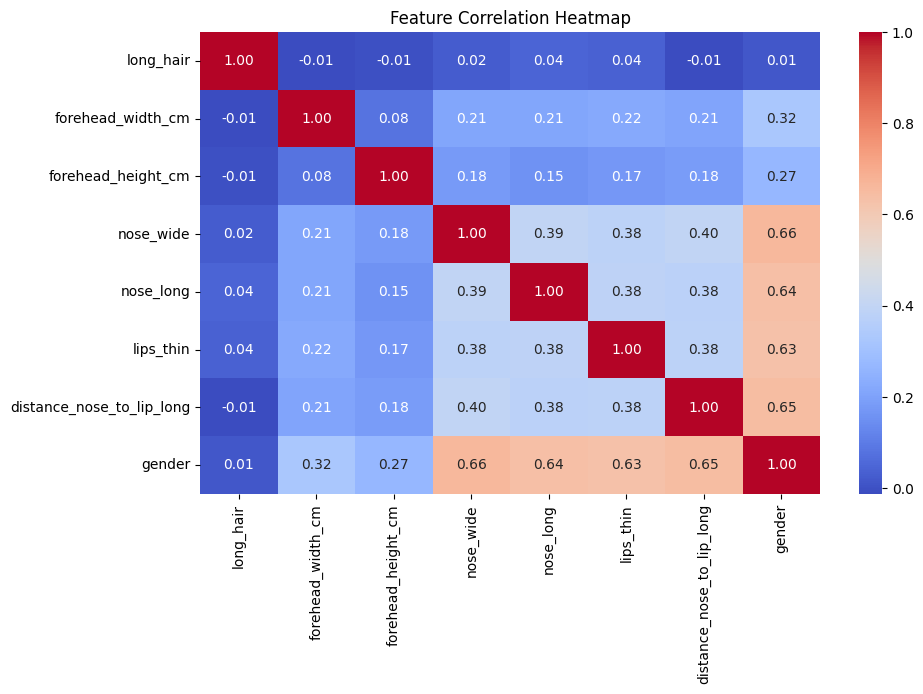

In [86]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


### Gender Distribution

<ipython-input-82-5e685dd0ec33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], palette="coolwarm")


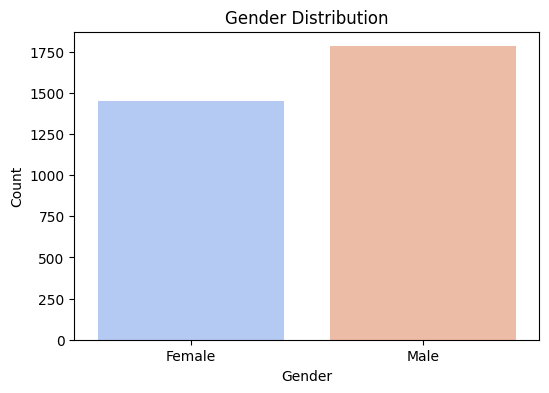

In [82]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['gender'], palette="coolwarm")
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


###Forehead Width by Gender

<ipython-input-87-63f902ece9f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['gender'], y=df['forehead_width_cm'], palette="Set2")


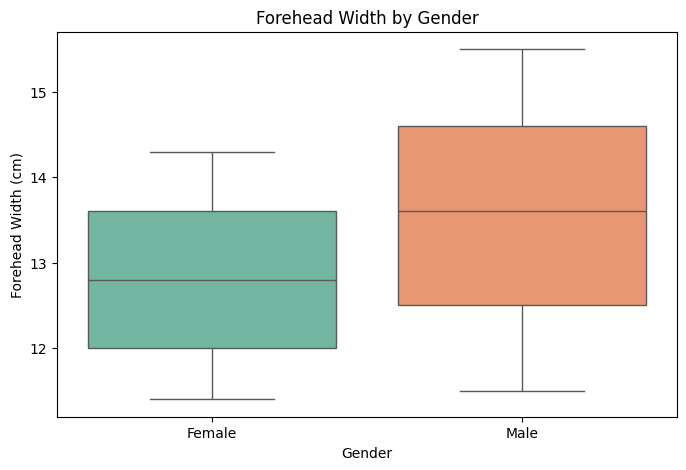

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['gender'], y=df['forehead_width_cm'], palette="Set2")
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Forehead Width by Gender")
plt.xlabel("Gender")
plt.ylabel("Forehead Width (cm)")
plt.show()


###Forehead Height Distribution

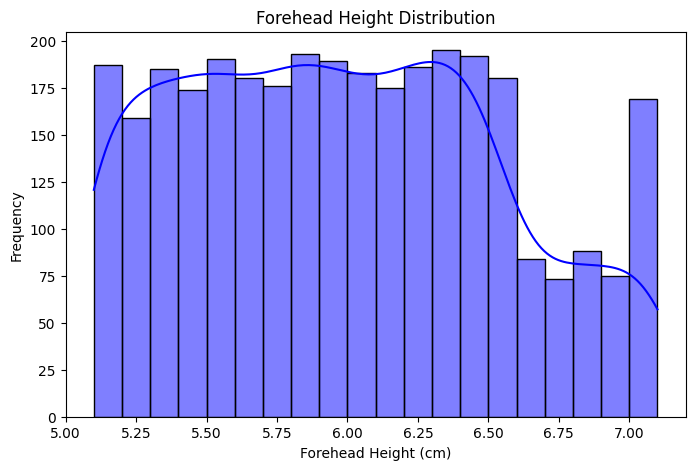

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(df['forehead_height_cm'], bins=20, kde=True, color='blue')
plt.title("Forehead Height Distribution")
plt.xlabel("Forehead Height (cm)")
plt.ylabel("Frequency")
plt.show()


###Build a model from scratch

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

X = df.drop(columns=["gender"])
Y = df["gender"]

if X.shape[0] == Y.shape[0]:
  print("Continue Further")
else:
  print("X and Y are not created correctly")

Continue Further


In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# x_train = np.array(x_train, dtype=float)
# x_test = np.array(x_test, dtype=float)
# y_train = np.array(y_train, dtype=float)
# y_test = np.array(y_test, dtype=float)
print(y_test)
print(x_test)
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
if x_train.shape[0] == y_train.shape[0]:
  print("Continue Further")
else:
  print("x_train and y_train are not created correctly")

1011    1
2731    1
1124    1
1835    0
211     0
       ..
1435    0
712     0
1002    1
3169    1
4362    1
Name: gender, Length: 970, dtype: int64
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
1011          1               11.8                 6.7          1          0   
2731          1               13.4                 5.9          1          1   
1124          0               13.5                 7.1          1          1   
1835          1               11.5                 6.3          0          0   
211           1               13.8                 5.3          0          1   
...         ...                ...                 ...        ...        ...   
1435          1               14.3                 6.2          0          1   
712           1               14.1                 5.7          0          0   
1002          0               13.5                 6.4          1          1   
3169          1               11.7                

In [60]:

def logistic_function(x):
  """
  Computes the logistic function applied to any value of x.
  Arguments:
    x: scalar or numpy array of any size.
  Returns:
    y: logistic function applied to x.
  """
  import numpy as np

  y = 1 / (1 + np.exp(-x))
  return y

In [61]:
def log_loss(y_true, y_pred):
  """
  Computes log loss for true target value y ={0 or 1} and predicted target value y' inbetween {0-1}.
  Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted taget value {0-1}.
  Returns:
    loss (float): loss/error value
  """
  import numpy as np
  loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
  return loss

In [62]:
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
      y_true    (array_like, shape (m,)): array of true values (0 or 1)
      y_pred (array_like, shape (m,)): array of predicted values (probability of y_pred being 1)
    Returns:
      cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = sum(log_loss(y_true, y_pred))
    cost = loss_vec/n
    return cost

In [63]:
def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      cost (float): nonnegative cost corresponding to y and y_dash
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    z = X.dot(w) + b
    y_pred = 1/(1+np.exp(-z))
    cost = cost_function(y, y_pred)
    return cost

In [64]:
# Function to compute gradients of the cost function with respect to model parameters - using vectorization
def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): array of true values of target (0 or 1)
      w (array_like, shape (n,)): weight parameters of the model
      b (float)                 : bias parameter of the model
    Returns:
      grad_w (array_like, shape (n,)): gradients of the cost function with respect to the weight parameters
      grad_b (float)                 : gradient of the cost function with respect to the bias parameter
    """
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    y_pred = logistic_function(np.dot(X, w) + b)
    grad_w = (1/m)* X.T.dot(y_pred - y)
    grad_b = (1/m)* np.sum(y_pred - y)
    return grad_w, grad_b

In [65]:
# Gradient descent algorithm for logistic regression
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost = True, show_params = False):
    """
    Implements batch gradient descent algorithm to learn and update model parameters
    with prespecified number of interations and learning rate
    Args:
      X (ndarray, shape (m,n))  : data on features, m observations with n features
      y (array_like, shape (m,)): true values of target (0 or 1)
      w (array_like, shape (n,)): initial value of weight parameters
      b (scalar)                : initial value of bias parameter
      cost_func                 : function to compute cost
      grad_func                 : function to compute gradients of cost with respect to model parameters
      alpha (float)             : learning rate
      n_iter (int)              : number of iterations
    Returns:
      w (array_like, shape (n,)): updated values of weight parameters
      b (scalar)                : updated value of bias parameter
    """
    from tqdm.contrib import itertools
    import math
    import tqdm
    from time import sleep
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match"
    assert len(w) == n, "Number of features and number of weight parameters do not match"
    cost_history, params_history = [], []
    for i, j in itertools.product(range(n_iter), range(1)):
        grad_w, grad_b = compute_gradient(X, y, w, b)
        w += -alpha * grad_w
        b += -alpha * grad_b
        cost =  costfunction_logreg(X, y, w, b)
        cost_history.append(cost)
        params_history.append([w, b])


    return w, b, cost_history, params_history


###Scaling the features

In [66]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [67]:
# Initialize parameters
n_features = x_train_scaled.shape[1]
w = np.zeros(n_features)  # Initialize weights as zeros
b = 0  # Initialize bias as 0

In [68]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Run gradient descent
w_optimized, b_optimized, cost_history, params_history = gradient_descent(
    x_train_scaled, y_train, w, b, learning_rate, num_iterations
)

# Print final parameters
print("Optimized weights (w):", w_optimized)
print("Optimized bias (b):", b_optimized)

  0%|          | 0/1000 [00:00<?, ?it/s]

Optimized weights (w): [0.00604981 0.35548931 0.3143345  0.93675848 0.86163993 0.89382417
 0.89372855]
Optimized bias (b): 0.2226290249727113


In [69]:
# Make predictions on the test set
y_pred_prob = logistic_function(np.dot(x_test_scaled, w_optimized) + b_optimized)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.9556701030927836

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       420
           1       0.97      0.95      0.96       550

    accuracy                           0.96       970
   macro avg       0.95      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970

Confusion Matrix:
[[405  15]
 [ 28 522]]


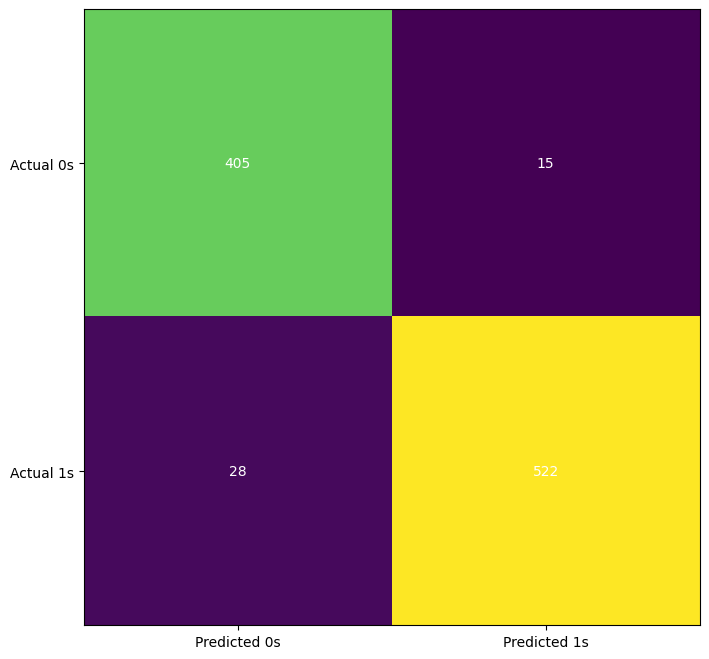

In [70]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

##Build a primary model

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Initialize Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train_scaled, y_train)

# Make predictions
y_pred_tree = tree_model.predict(x_test_scaled)

# Model evaluation
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_tree)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_tree)}")
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

Decision Tree Evaluation:
Accuracy: 0.9422680412371134
Confusion Matrix:
[[394  26]
 [ 30 520]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       420
           1       0.95      0.95      0.95       550

    accuracy                           0.94       970
   macro avg       0.94      0.94      0.94       970
weighted avg       0.94      0.94      0.94       970



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(x_test_scaled)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")

Random Forest F1 Score: 0.9557
Confusion Matrix:
[[400  20]
 [ 23 527]]
Accuracy: 0.9556701030927836
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       420
           1       0.96      0.96      0.96       550

    accuracy                           0.96       970
   macro avg       0.95      0.96      0.95       970
weighted avg       0.96      0.96      0.96       970



In [73]:
from sklearn.model_selection import GridSearchCV

tree_params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring="accuracy")
grid_tree.fit(x_train_scaled, y_train)

# Best hyperparameters for Decision Tree
print("\nBest Parameters for Decision Tree:")
print(grid_tree.best_params_)

# Hyperparameter tuning for Random Forest
rf_params = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy")
grid_rf.fit(x_train_scaled, y_train)

# Best hyperparameters for Random Forest
print("\nBest Parameters for Random Forest:")
print(grid_rf.best_params_)



Best Parameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


In [74]:
from sklearn.feature_selection import RFE

tree_clf = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=tree_clf, n_features_to_select=6)
rfe.fit(x_train_scaled, y_train)

selected_features_tree = X.columns[rfe.support_]
print("Selected Features for Decision Tree:", selected_features_tree)
print(f"Selected Features Mask: {rfe.support_}")
print(f"Feature Ranking: {rfe.ranking_}")

Selected Features for Decision Tree: Index(['forehead_width_cm', 'forehead_height_cm', 'nose_wide', 'nose_long',
       'lips_thin', 'distance_nose_to_lip_long'],
      dtype='object')
Selected Features Mask: [False  True  True  True  True  True  True]
Feature Ranking: [2 1 1 1 1 1 1]


In [75]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_scaled, y_train)  # Train the model

# Get feature importance scores
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort features by importance
feature_importances = feature_importances.sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

#Selecting top 6 features
top_features = feature_importances[:6].index
print("Selected Features:", top_features)



Feature Importances:
 nose_wide                    0.215439
distance_nose_to_lip_long    0.206166
lips_thin                    0.196386
nose_long                    0.173289
forehead_width_cm            0.113578
forehead_height_cm           0.090917
long_hair                    0.004227
dtype: float64
Selected Features: Index(['nose_wide', 'distance_nose_to_lip_long', 'lips_thin', 'nose_long',
       'forehead_width_cm', 'forehead_height_cm'],
      dtype='object')


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=X.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=X.columns)

# Select the important features from Task 5

selected_features_rf = ['nose_wide', 'distance_nose_to_lip_long', 'lips_thin', 'nose_long',
       'forehead_width_cm', 'forehead_height_cm']

# Subset the dataset with selected features
x_train_rf = x_train_scaled_df[selected_features_rf]
x_test_rf = x_test_scaled_df[selected_features_rf]

# Rebuild Random Forest model with optimal hyperparameters
rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=5, random_state=42)
rf.fit(x_train_rf, y_train)
y_pred_rf = rf.predict(x_test_rf)

# Evaluate Random Forest
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("\nRandom Forest Evaluation:")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")



Random Forest Evaluation:
Random Forest F1 Score: 0.9567
Confusion Matrix:
[[402  18]
 [ 24 526]]
Accuracy: 0.9567010309278351
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       420
           1       0.97      0.96      0.96       550

    accuracy                           0.96       970
   macro avg       0.96      0.96      0.96       970
weighted avg       0.96      0.96      0.96       970

